In [1]:
import pandas as pd
import numpy as np
import time
import datetime
import seaborn as sns

import requests
from bs4 import BeautifulSoup

### 구글 검색을 통해 업비트 데이터를 불러올 수 있는 pyupbit 라이브러리를 사용하였다. 

In [130]:
import pyupbit
print(pyupbit.Upbit)

<class 'pyupbit.exchange_api.Upbit'>


In [131]:
df = pyupbit.get_ohlcv("KRW-BTC", count = 2000)
df

,open,high,low,close,volume,value
2017-09-25 09:00:00,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08
2017-09-26 09:00:00,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07
2017-09-27 09:00:00,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08
2017-09-28 09:00:00,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08
2017-09-29 09:00:00,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08
...,...,...,...,...,...,...
2021-05-30 09:00:00,42688000.0,43827000.0,40580000.0,43177000.0,9194.807917,3.903808e+11
2021-05-31 09:00:00,43177000.0,44235000.0,41304000.0,43761000.0,10111.066220,4.336194e+11
2021-06-01 09:00:00,43761000.0,44550000.0,42515000.0,43200000.0,9081.150288,3.948303e+11
2021-06-02 09:00:00,43207000.0,44341000.0,42550000.0,43732000.0,7405.760642,3.217178e+11


In [132]:
from datetime import datetime,date

df1 = df.reset_index()

In [133]:
df1.rename(columns = {'index' : 'date'}, inplace = True) 
df1['date'] = pd.to_datetime(df1['date']).dt.normalize()
df2 = df1.set_index('date')
df2

,open,high,low,close,volume,value
date,,,,,,
2017-09-25,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08
2017-09-26,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07
2017-09-27,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08
2017-09-28,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08
2017-09-29,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08
...,...,...,...,...,...,...
2021-05-30,42688000.0,43827000.0,40580000.0,43177000.0,9194.807917,3.903808e+11
2021-05-31,43177000.0,44235000.0,41304000.0,43761000.0,10111.066220,4.336194e+11
2021-06-01,43761000.0,44550000.0,42515000.0,43200000.0,9081.150288,3.948303e+11


In [134]:
import pandas as pd
df2.to_csv('../upbit/data/bitcoin.csv', encoding='utf-8')

In [135]:
df = pd.read_csv("../upbit/data/bitcoin.csv", encoding='utf-8', index_col= 0)

In [136]:
df

,open,high,low,close,volume,value
date,,,,,,
2017-09-25,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08
2017-09-26,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07
2017-09-27,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08
2017-09-28,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08
2017-09-29,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08
...,...,...,...,...,...,...
2021-05-30,42688000.0,43827000.0,40580000.0,43177000.0,9194.807917,3.903808e+11
2021-05-31,43177000.0,44235000.0,41304000.0,43761000.0,10111.066220,4.336194e+11
2021-06-01,43761000.0,44550000.0,42515000.0,43200000.0,9081.150288,3.948303e+11


## 간단히 그래프 확인 

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'비트코인 시각화'}, xlabel='date'>

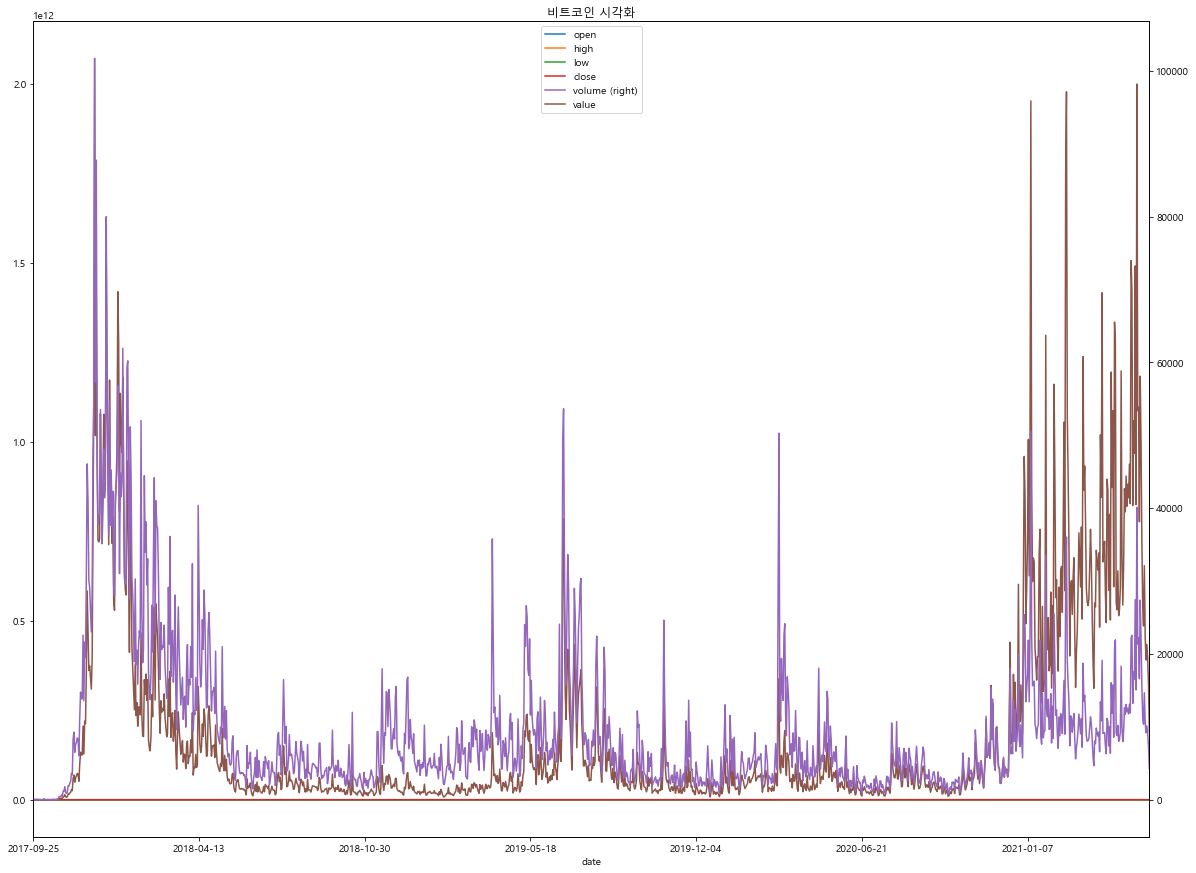

In [138]:
df.plot(title = '비트코인 시각화', secondary_y = "volume", figsize = (20, 15))

## 더 보기 쉽게 캔들스틱으로 정리

In [139]:
df.reset_index(inplace = True)

In [140]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.models.formatters import NumeralTickFormatter

output_notebook()
inc = df.close >= df.open
dec = df.open > df.close

#캔들 
p_candlechart = figure(plot_width = 1050, plot_height = 300, x_range=(-1, len(df)), 
                       tools = ['xpan, crosshair, xwheel_zoom, reset, hover, box_select, save'])
p_candlechart.segment(df.index[inc], df.high[inc], df.date[inc], df.low[inc], color = "green")
p_candlechart.segment(df.index[dec], df.high[dec], df.date[dec], df.low[dec], color = "red")
p_candlechart.vbar(df.index[inc], 0.5, df.open[inc], df.close[inc], color = "green", line_color="green")
p_candlechart.vbar(df.index[dec], 0.5, df.open[dec], df.close[dec], color = "red", line_color="red")

#날짜 표시 
major_label = {
    i : date.strftime('%Y-%m-%d') for i, date in enumerate(pd.to_datetime(df["date"]))
}
major_label.update({len(df): ''})
p_candlechart.xaxis.major_label_overrides = major_label
p_candlechart.yaxis[0].formatter = NumeralTickFormatter(format ='0,0')


#그리기 
p = gridplot([[p_candlechart]])
show(p)

Loading BokehJS ...

# 금리 데이터 전처리

In [141]:
interest_rate = pd.read_excel('../data_1/stat_107301.xls', header=2)
interest_rate = interest_rate.drop(index=[7, 8], axis=0)
interest_rate = interest_rate.transpose()

interest_rate.rename(columns=interest_rate.iloc[0],inplace=True)
interest_rate = interest_rate.drop(interest_rate.index[0])
interest_rate

,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
201709월,1.79,1.99,2.29,2.33,1.38,1.25,1.25
201710월,2.03,2.25,2.46,2.57,1.38,1.24,1.25
201711월,2.15,2.36,2.54,2.71,1.45,1.26,1.5
201712월,2.1,2.3,2.47,2.65,1.66,1.51,1.5
201801월,2.19,2.44,2.63,2.72,1.66,1.49,1.5
201802월,2.28,2.54,2.77,2.82,1.65,1.49,1.5
201803월,2.27,2.5,2.71,2.83,1.65,1.49,1.5
201804월,2.19,2.44,2.66,2.79,1.65,1.47,1.5
201805월,2.25,2.53,2.76,2.86,1.65,1.5,1.5
201806월,2.18,2.44,2.66,2.81,1.65,1.49,1.5


In [142]:
interest_rate.to_csv('../output/시장금리.csv', encoding = 'UTF-8-sig')

In [143]:
interest_rate = pd.read_csv('../output/시장금리.csv', encoding = 'UTF-8', index_col= 0)
interest_rate.index

Index(['201709월', '201710월', '201711월', '201712월', '201801월', '201802월',
       '201803월', '201804월', '201805월', '201806월', '201807월', '201808월',
       '201809월', '201810월', '201811월', '201812월', '201901월', '201902월',
       '201903월', '201904월', '201905월', '201906월', '201907월', '201908월',
       '201909월', '201910월', '201911월', '201912월', '202001월', '202002월',
       '202003월', '202004월', '202005월', '202006월', '202007월', '202008월',
       '202009월', '202010월', '202011월', '202012월', '202101월', '202102월',
       '202103월', '202104월'],
      dtype='object')

In [144]:
interest_rate.reset_index(inplace = True)
interest_rate.rename(columns = {'index' : 'date1'}, inplace = True) 

interest_rate

,date1,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
0,201709월,1.79,1.99,2.29,2.33,1.38,1.25,1.25
1,201710월,2.03,2.25,2.46,2.57,1.38,1.24,1.25
2,201711월,2.15,2.36,2.54,2.71,1.45,1.26,1.50
3,201712월,2.10,2.30,2.47,2.65,1.66,1.51,1.50
4,201801월,2.19,2.44,2.63,2.72,1.66,1.49,1.50
5,201802월,2.28,2.54,2.77,2.82,1.65,1.49,1.50
6,201803월,2.27,2.50,2.71,2.83,1.65,1.49,1.50
7,201804월,2.19,2.44,2.66,2.79,1.65,1.47,1.50
8,201805월,2.25,2.53,2.76,2.86,1.65,1.50,1.50
9,201806월,2.18,2.44,2.66,2.81,1.65,1.49,1.50


In [145]:
interest_rate['date2'] = interest_rate['date1'].str[0:4] + '-' + interest_rate['date1'].str[4:6]
interest_rate['date2']

0     2017-09
1     2017-10
2     2017-11
3     2017-12
4     2018-01
5     2018-02
6     2018-03
7     2018-04
8     2018-05
9     2018-06
10    2018-07
11    2018-08
12    2018-09
13    2018-10
14    2018-11
15    2018-12
16    2019-01
17    2019-02
18    2019-03
19    2019-04
20    2019-05
21    2019-06
22    2019-07
23    2019-08
24    2019-09
25    2019-10
26    2019-11
27    2019-12
28    2020-01
29    2020-02
30    2020-03
31    2020-04
32    2020-05
33    2020-06
34    2020-07
35    2020-08
36    2020-09
37    2020-10
38    2020-11
39    2020-12
40    2021-01
41    2021-02
42    2021-03
43    2021-04
Name: date2, dtype: object

In [146]:
from datetime import datetime
interest_rate['date'] = pd.to_datetime(interest_rate['date2'])
interest_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 10 columns):
date1          44 non-null object
국고채 3년(평균)     44 non-null float64
국고채 5년(평균)     44 non-null float64
국고채 10년(평균)    44 non-null float64
회사채 3년(평균)     44 non-null float64
CD 91물(평균)     44 non-null float64
콜금리(1일물,평균)    44 non-null float64
기준금리           44 non-null float64
date2          44 non-null object
date           44 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 3.6+ KB


In [147]:
del interest_rate['date1']
del interest_rate['date2']

In [148]:
interest_rate['date'] = pd.to_datetime(interest_rate['date']).dt.normalize()
interest_rate

,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리,date
0,1.79,1.99,2.29,2.33,1.38,1.25,1.25,2017-09-01
1,2.03,2.25,2.46,2.57,1.38,1.24,1.25,2017-10-01
2,2.15,2.36,2.54,2.71,1.45,1.26,1.50,2017-11-01
3,2.10,2.30,2.47,2.65,1.66,1.51,1.50,2017-12-01
4,2.19,2.44,2.63,2.72,1.66,1.49,1.50,2018-01-01
5,2.28,2.54,2.77,2.82,1.65,1.49,1.50,2018-02-01
6,2.27,2.50,2.71,2.83,1.65,1.49,1.50,2018-03-01
7,2.19,2.44,2.66,2.79,1.65,1.47,1.50,2018-04-01
8,2.25,2.53,2.76,2.86,1.65,1.50,1.50,2018-05-01
9,2.18,2.44,2.66,2.81,1.65,1.49,1.50,2018-06-01


In [149]:
interest_rate = interest_rate.set_index('date')
interest_rate

,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
date,,,,,,,
2017-09-01,1.79,1.99,2.29,2.33,1.38,1.25,1.25
2017-10-01,2.03,2.25,2.46,2.57,1.38,1.24,1.25
2017-11-01,2.15,2.36,2.54,2.71,1.45,1.26,1.50
2017-12-01,2.10,2.30,2.47,2.65,1.66,1.51,1.50
2018-01-01,2.19,2.44,2.63,2.72,1.66,1.49,1.50
2018-02-01,2.28,2.54,2.77,2.82,1.65,1.49,1.50
2018-03-01,2.27,2.50,2.71,2.83,1.65,1.49,1.50
2018-04-01,2.19,2.44,2.66,2.79,1.65,1.47,1.50
2018-05-01,2.25,2.53,2.76,2.86,1.65,1.50,1.50


## 비교하기 위한 업비트 월봉

In [150]:
month = pyupbit.get_ohlcv("KRW-BTC", interval="month")
month

,open,high,low,close,volume,value
2017-09-01 09:00:00,4201000.0,4896000.0,4175000.0,4895000.0,3.474819e+02,1.544806e+09
2017-10-01 09:00:00,4889000.0,7479000.0,4682000.0,7422000.0,4.282096e+03,2.879232e+10
2017-11-01 09:00:00,7422000.0,13750000.0,6476000.0,11935000.0,3.328704e+05,3.333919e+12
2017-12-01 09:00:00,11935000.0,24967000.0,11201000.0,19280000.0,1.423404e+06,2.713279e+13
2018-01-01 09:00:00,19278000.0,28885000.0,10400000.0,11429000.0,1.138496e+06,2.096834e+13
2018-02-01 09:00:00,11439000.0,14149000.0,6620000.0,11860000.0,7.806840e+05,8.338554e+12
2018-03-01 09:00:00,11865000.0,12899000.0,7431000.0,7697000.0,5.759458e+05,5.805374e+12
2018-04-01 09:00:00,7688000.0,10755000.0,7087000.0,10138000.0,5.736338e+05,4.959893e+12
2018-05-01 09:00:00,10135000.0,10963000.0,7813000.0,8282000.0,2.722675e+05,2.607958e+12
2018-06-01 09:00:00,8278000.0,8490000.0,6590000.0,7164000.0,1.177830e+05,8.843899e+11


In [151]:
month.reset_index(inplace = True)
month.rename(columns = {'index' : 'date1'}, inplace = True) 
month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
date1     46 non-null datetime64[ns]
open      46 non-null float64
high      46 non-null float64
low       46 non-null float64
close     46 non-null float64
volume    46 non-null float64
value     46 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.6 KB


In [152]:
month['date2'] = pd.to_datetime(month['date1'], format="%Y-%m")
month['date'] = pd.to_datetime(month['date2']).dt.normalize()

del month['date1']
del month['date2']


month1 = month.set_index('date')
month1

,open,high,low,close,volume,value
date,,,,,,
2017-09-01,4201000.0,4896000.0,4175000.0,4895000.0,3.474819e+02,1.544806e+09
2017-10-01,4889000.0,7479000.0,4682000.0,7422000.0,4.282096e+03,2.879232e+10
2017-11-01,7422000.0,13750000.0,6476000.0,11935000.0,3.328704e+05,3.333919e+12
2017-12-01,11935000.0,24967000.0,11201000.0,19280000.0,1.423404e+06,2.713279e+13
2018-01-01,19278000.0,28885000.0,10400000.0,11429000.0,1.138496e+06,2.096834e+13
2018-02-01,11439000.0,14149000.0,6620000.0,11860000.0,7.806840e+05,8.338554e+12
2018-03-01,11865000.0,12899000.0,7431000.0,7697000.0,5.759458e+05,5.805374e+12
2018-04-01,7688000.0,10755000.0,7087000.0,10138000.0,5.736338e+05,4.959893e+12
2018-05-01,10135000.0,10963000.0,7813000.0,8282000.0,2.722675e+05,2.607958e+12


In [153]:
month1.to_csv('../output/비트코인 월봉 원본.csv', encoding='utf-8')

In [154]:
mon = month1[['open', 'high', 'low', 'close', 'volume']]
mon

,open,high,low,close,volume
date,,,,,
2017-09-01,4201000.0,4896000.0,4175000.0,4895000.0,3.474819e+02
2017-10-01,4889000.0,7479000.0,4682000.0,7422000.0,4.282096e+03
2017-11-01,7422000.0,13750000.0,6476000.0,11935000.0,3.328704e+05
2017-12-01,11935000.0,24967000.0,11201000.0,19280000.0,1.423404e+06
2018-01-01,19278000.0,28885000.0,10400000.0,11429000.0,1.138496e+06
2018-02-01,11439000.0,14149000.0,6620000.0,11860000.0,7.806840e+05
2018-03-01,11865000.0,12899000.0,7431000.0,7697000.0,5.759458e+05
2018-04-01,7688000.0,10755000.0,7087000.0,10138000.0,5.736338e+05
2018-05-01,10135000.0,10963000.0,7813000.0,8282000.0,2.722675e+05


In [155]:
mon.to_csv('../output/비트코인 월봉 close.csv', encoding='utf-8')

## 비트코인과 시장금리 합치기

In [156]:
interest =interest_rate.iloc[:,[0,1,2]]
interest

,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균)
date,,,
2017-09-01,1.79,1.99,2.29
2017-10-01,2.03,2.25,2.46
2017-11-01,2.15,2.36,2.54
2017-12-01,2.10,2.30,2.47
2018-01-01,2.19,2.44,2.63
2018-02-01,2.28,2.54,2.77
2018-03-01,2.27,2.50,2.71
2018-04-01,2.19,2.44,2.66
2018-05-01,2.25,2.53,2.76


In [157]:
interest.to_csv("../upbit/interest.csv", encoding='UTF-8-sig')

In [158]:
interest = pd.read_csv('../upbit/interest.csv',names=['date', 'three', 'five', 'ten' ], encoding='utf-8', header = 0)
interest

,date,three,five,ten
0,2017-09-01,1.79,1.99,2.29
1,2017-10-01,2.03,2.25,2.46
2,2017-11-01,2.15,2.36,2.54
3,2017-12-01,2.10,2.30,2.47
4,2018-01-01,2.19,2.44,2.63
5,2018-02-01,2.28,2.54,2.77
6,2018-03-01,2.27,2.50,2.71
7,2018-04-01,2.19,2.44,2.66
8,2018-05-01,2.25,2.53,2.76
9,2018-06-01,2.18,2.44,2.66


In [159]:
interest['total_mean'] = round((interest['three'] + interest['five'] + interest['ten']) / 3, 2)
interest

,date,three,five,ten,total_mean
0,2017-09-01,1.79,1.99,2.29,2.02
1,2017-10-01,2.03,2.25,2.46,2.25
2,2017-11-01,2.15,2.36,2.54,2.35
3,2017-12-01,2.10,2.30,2.47,2.29
4,2018-01-01,2.19,2.44,2.63,2.42
5,2018-02-01,2.28,2.54,2.77,2.53
6,2018-03-01,2.27,2.50,2.71,2.49
7,2018-04-01,2.19,2.44,2.66,2.43
8,2018-05-01,2.25,2.53,2.76,2.51
9,2018-06-01,2.18,2.44,2.66,2.43


In [160]:
del interest['three']
del interest['five']
del interest['ten']
interest

,date,total_mean
0,2017-09-01,2.02
1,2017-10-01,2.25
2,2017-11-01,2.35
3,2017-12-01,2.29
4,2018-01-01,2.42
5,2018-02-01,2.53
6,2018-03-01,2.49
7,2018-04-01,2.43
8,2018-05-01,2.51
9,2018-06-01,2.43


In [161]:
interest.set_index('date', inplace=True)
interest

,total_mean
date,
2017-09-01,2.02
2017-10-01,2.25
2017-11-01,2.35
2017-12-01,2.29
2018-01-01,2.42
2018-02-01,2.53
2018-03-01,2.49
2018-04-01,2.43
2018-05-01,2.51


In [162]:
join = mon.join(interest, how='inner')
join

,open,high,low,close,volume,total_mean
date,,,,,,
2017-09-01,4201000.0,4896000.0,4175000.0,4895000.0,3.474819e+02,2.02
2017-10-01,4889000.0,7479000.0,4682000.0,7422000.0,4.282096e+03,2.25
2017-11-01,7422000.0,13750000.0,6476000.0,11935000.0,3.328704e+05,2.35
2017-12-01,11935000.0,24967000.0,11201000.0,19280000.0,1.423404e+06,2.29
2018-01-01,19278000.0,28885000.0,10400000.0,11429000.0,1.138496e+06,2.42
2018-02-01,11439000.0,14149000.0,6620000.0,11860000.0,7.806840e+05,2.53
2018-03-01,11865000.0,12899000.0,7431000.0,7697000.0,5.759458e+05,2.49
2018-04-01,7688000.0,10755000.0,7087000.0,10138000.0,5.736338e+05,2.43
2018-05-01,10135000.0,10963000.0,7813000.0,8282000.0,2.722675e+05,2.51


<AxesSubplot:title={'center':'비트코인과 시장금리'}, xlabel='date'>

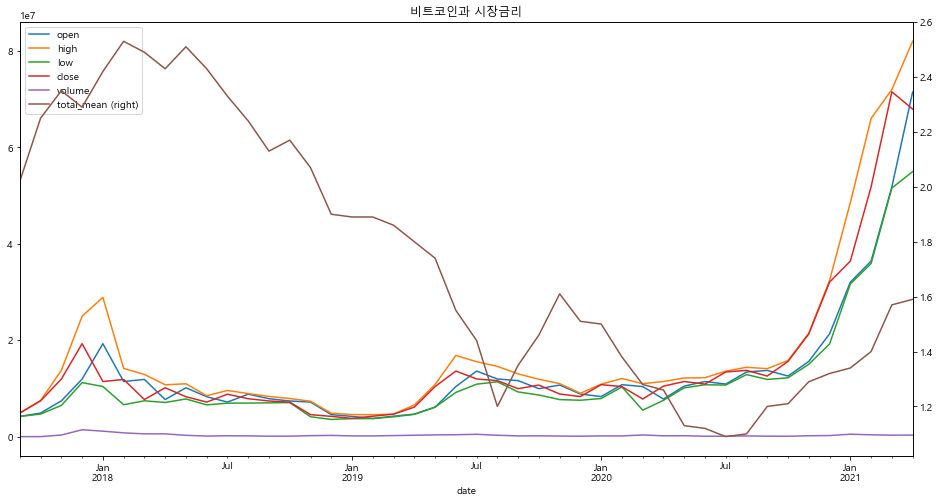

In [163]:
join.plot(title = '비트코인과 시장금리', secondary_y = "total_mean", figsize = (16, 8))

In [164]:
join.to_csv('../upbit/output/비트코인+시장금리_월봉.csv ', encoding='utf-8')